# Importing Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [5]:
print ("TensorFlow version: " + tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow version: 2.11.0


SystemError: GPU device not found

# Loading Data

In [8]:
sign_train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
sign_test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

# Exploring Data

In [9]:
sign_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
print(sign_test.shape)
print(sign_train.shape)

(7172, 785)
(27455, 785)


In [11]:
sign_train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

# Preprocessing & Modeling

In [12]:
# splitting data
inputs_train = sign_train.iloc[:, 1:].to_numpy()
targets_train = sign_train['label'].to_numpy()
inputs_test = sign_test.iloc[:, 1:].to_numpy()
targets_test = sign_test['label'].to_numpy()

In [13]:
# normalize inputs
inputs_train = inputs_train / 255.0
inputs_test = inputs_test / 255.0

Label: L


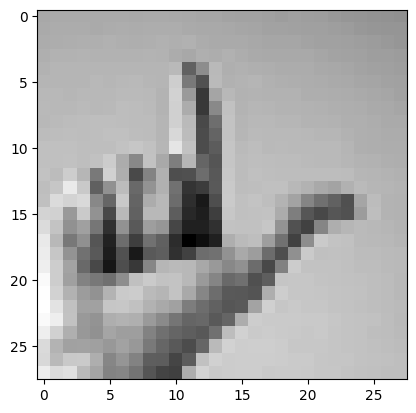

In [14]:
import string
letter = dict(enumerate(string.ascii_uppercase))

# display a random image 
img1 = np.reshape(inputs_train[668,:], (28, 28))
plt.imshow(img1, cmap='gray')
print('Label:', letter[targets_train[668]])


## logistic regression

In [10]:
# logistic regression model
model = LogisticRegression(penalty='l2',multi_class='multinomial',solver='sag')

In [11]:
model.fit(inputs_train,targets_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [12]:
print(model.score(inputs_train,targets_train))
print(model.score(inputs_test,targets_test))

0.9998543070478966
0.6977133296151701


In [13]:
pred = model.predict(inputs_test)
print('Model accuracy : {0:0.2f}'. format(accuracy_score(targets_test, pred)))

Model accuracy : 0.70


In [14]:
import pickle
pickle.dump(model, open("log_reg.plk", 'wb'))

Text(0.5, 192.72222222222217, 'Predicted label')

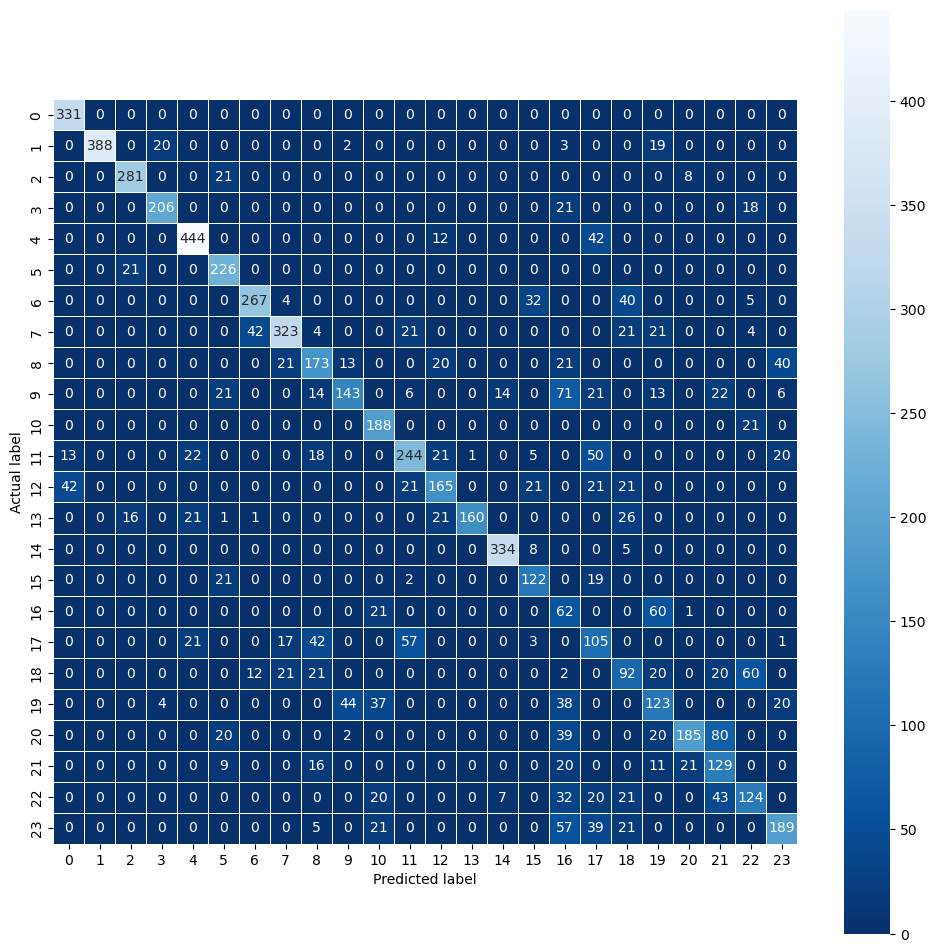

In [15]:
cm = confusion_matrix(y_true=targets_test, y_pred = pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## CNN

In [15]:
inputs_train = inputs_train.reshape(-1,28,28,1)
inputs_test = inputs_test.reshape(-1,28,28,1)

In [16]:
inputs_train.shape

(27455, 28, 28, 1)

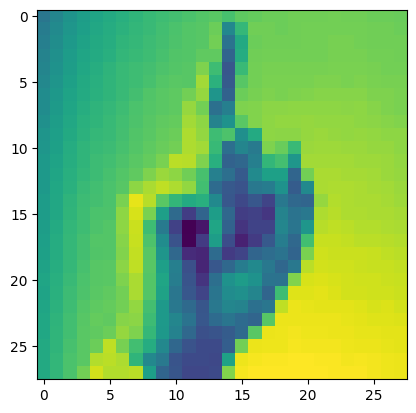

In [17]:
plt.imshow(inputs_train[0])

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten, Input, Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding



In [21]:
# Encode labels to one hot vectors (ex : ب -> [....,0,1,0,0,0,0,0,0,0,0])
Y_train = to_categorical(targets_train)
Y_test = to_categorical(targets_test)

In [22]:
# Set the CNN model 

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "softmax"))

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [23]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
# Split the train and the validation set for the fitting

X_train, X_val, y_train, y_val = train_test_split(inputs_train, Y_train, test_size = 0.2, random_state=2)

In [25]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [26]:
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [27]:
epochs = 7
batch_size = 128


model_checkpoint_callback = ModelCheckpoint(
    filepath="best.h5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val, y_val),steps_per_epoch=X_train.shape[0] // batch_size,
                              verbose = 2,   callbacks=[model_checkpoint_callback,learning_rate_reduction,es])

Epoch 1/7

Epoch 1: val_accuracy improved from -inf to 0.06247, saving model to best.h5
171/171 - 130s - loss: 1.7154 - accuracy: 0.4796 - val_loss: 7.1490 - val_accuracy: 0.0625 - lr: 0.0010 - 130s/epoch - 762ms/step
Epoch 2/7

Epoch 2: val_accuracy improved from 0.06247 to 0.09962, saving model to best.h5
171/171 - 140s - loss: 0.3905 - accuracy: 0.8659 - val_loss: 8.2942 - val_accuracy: 0.0996 - lr: 0.0010 - 140s/epoch - 818ms/step
Epoch 3/7

Epoch 3: val_accuracy improved from 0.09962 to 0.82244, saving model to best.h5
171/171 - 132s - loss: 0.1612 - accuracy: 0.9444 - val_loss: 0.4848 - val_accuracy: 0.8224 - lr: 0.0010 - 132s/epoch - 772ms/step
Epoch 4/7

Epoch 4: val_accuracy improved from 0.82244 to 0.99508, saving model to best.h5
171/171 - 148s - loss: 0.0951 - accuracy: 0.9669 - val_loss: 0.0147 - val_accuracy: 0.9951 - lr: 0.0010 - 148s/epoch - 864ms/step
Epoch 5/7

Epoch 5: val_accuracy did not improve from 0.99508
171/171 - 139s - loss: 0.0732 - accuracy: 0.9751 - val_lo

In [28]:
model.save("models/model_7_epoch.h5")

In [29]:
# import os
# os.chdir(r'/kaggle/working')
# from IPython.display import FileLink
# FileLink(r'models')

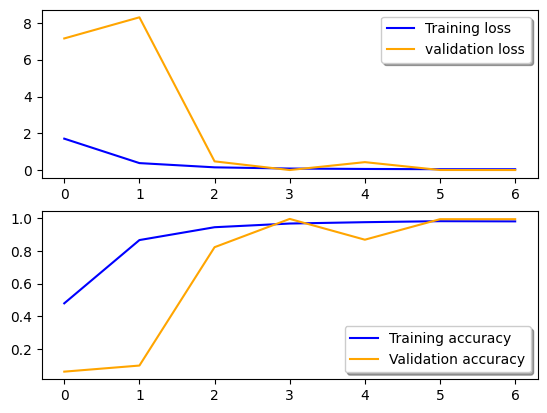

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [30]:
# evalute the model on test set
results = model.predict(inputs_test)
results

225/225 [==============================] - 15s 61ms/step


array([[3.0140276e-11, 3.8950540e-10, 8.5802814e-09, ..., 8.8822932e-10,
        1.5242775e-07, 4.5515414e-09],
       [3.8666669e-13, 1.1010742e-06, 5.2549146e-12, ..., 9.7460600e-07,
        3.3168442e-16, 8.4887258e-10],
       [1.0451389e-18, 1.8172706e-15, 2.1779063e-19, ..., 1.5240294e-12,
        1.2095096e-17, 7.1459905e-10],
       ...,
       [3.1086959e-18, 2.4046252e-18, 1.0000000e+00, ..., 7.6974609e-21,
        3.4762110e-19, 1.5470403e-16],
       [5.8632031e-06, 2.8791861e-10, 1.4081557e-13, ..., 3.9511065e-14,
        7.5565064e-13, 2.7646312e-11],
       [6.0704821e-19, 2.0274472e-19, 1.0000000e+00, ..., 2.1043285e-21,
        7.0292652e-20, 1.1522532e-16]], dtype=float32)

In [31]:
pred = np.argmax(results,axis = 1) 
pred

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [32]:
true = np.argmax(Y_test,axis = 1) 
true

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [33]:
cm = confusion_matrix(true, pred)
accuracy = sum(cm[i][i] for i in range(24)) / true.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9894032348020078


<Axes: >

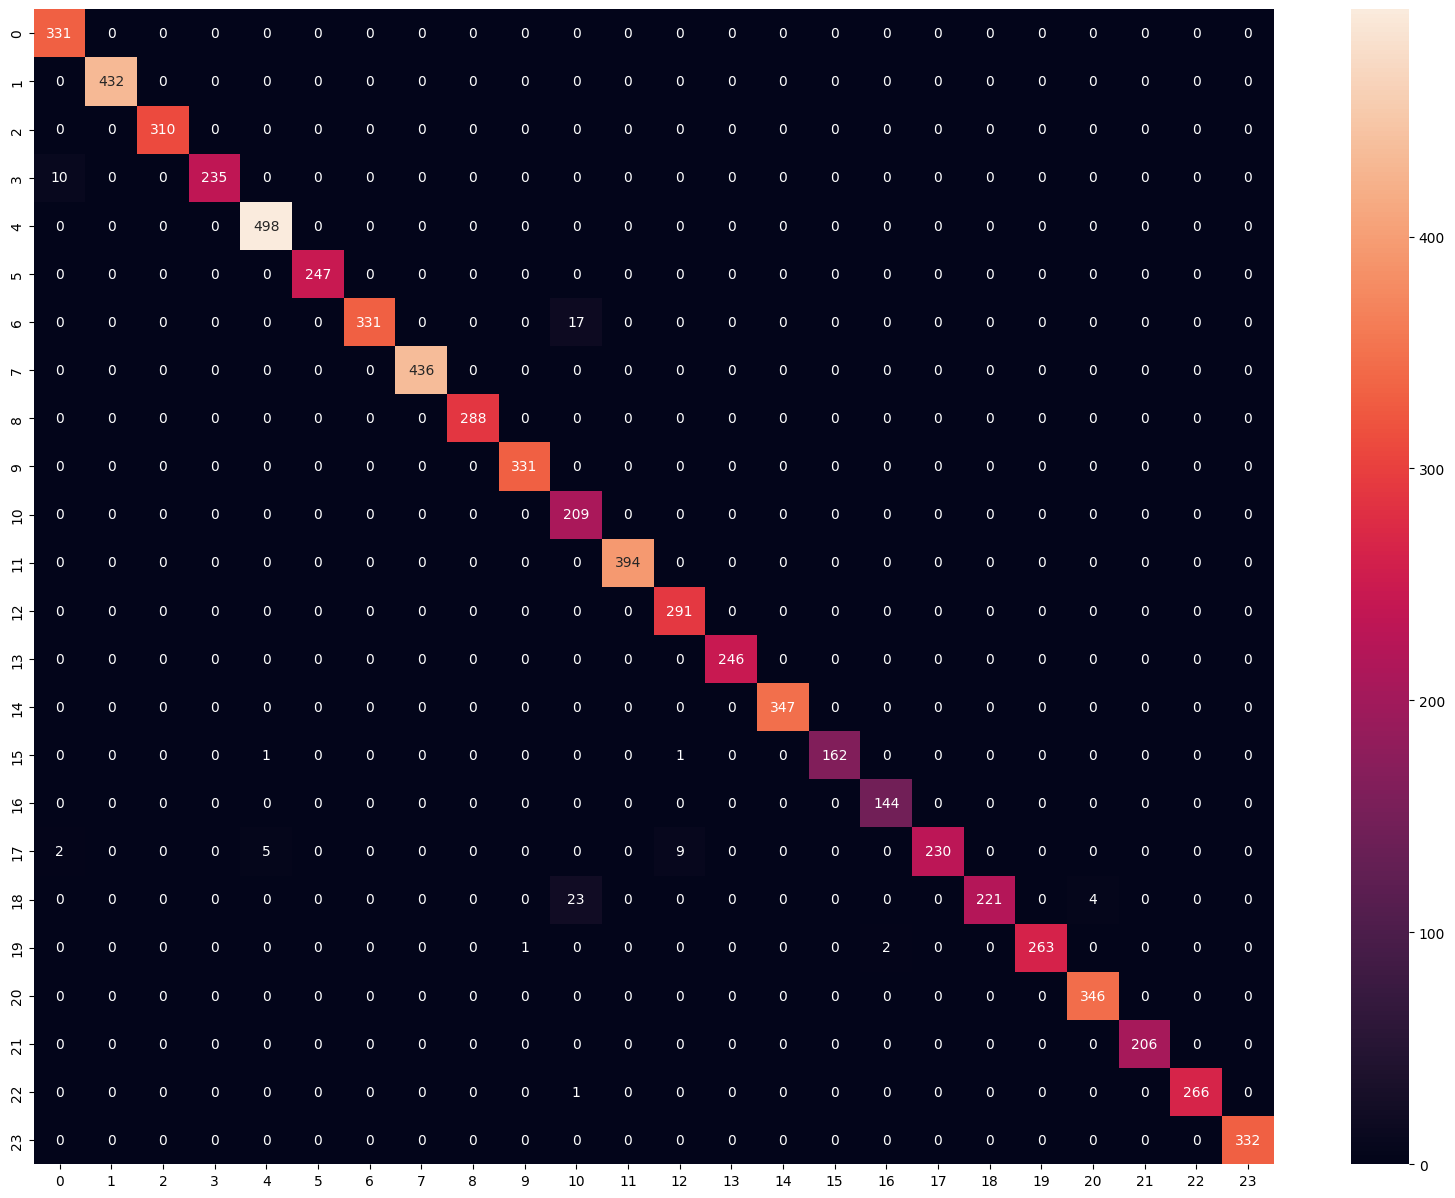

In [34]:
plt.figure(figsize=(20,15))

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")

- we reached 100% accuracy on test data 
- wait for next version with deployment